In [ ]:
#this code is referenced from the official tutorial

# Instance Segmentation

In this tutorial, you will learn:
- to perform inference with a MMDetection detector.
- to train a new instance segmentation model with a new dataset.
  
Please first go through the MMDet_Detection_Tutorial if you havent

# Install
We have MMpretrain installed for you when you see this page

# Start trying
Ensure you have selected the right kernel (on the top right corner of jupyter lab interface), the one you have just named <br>
now we change the directory to the installed location

In [1]:
cd mmdetection

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection


/home/z890/.conda/envs/mm_dete_cascad/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Download a pretrained model

there are plenty of models <br>
you may check what models are available on <br>
https://mmdetection.readthedocs.io/en/latest/modelzoo_statistics.html <br>
only part of the models support instance segmentation <br>
you can check the .py to confirm <br>
for example, in <br>
https://github.com/open-mmlab/mmdetection/tree/main/configs/atss <br>
the base config point to atss_r50_fpn_1x_coco.py <br>
we can find "bbox_head" but not "mask_head" <br>
so this model does not support instance segmentation <br>
in <br>
https://github.com/open-mmlab/mmdetection/tree/main/configs/mask_rcnn <br>
the base config point to mask-rcnn_r50_fpn.py <br> 
we can find both "bbox_head" and "mask_head" <br>
so the model supports instance segmentation <br>
you can utilize the search function in your computer file browser to find the config <br>
or run the below code to inspect what kind of models are available <br>

In [2]:
import os

base_dir = "./configs"
matched_files = []

for root, _, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".py"):
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
                if "bbox_head" in content and "mask_head" in content:
                    matched_files.append(file_path)

# Print results
for path in matched_files:
    print(path)

# the results show condinst, yolact, mask-rcnn, etc 

./configs/gn/mask-rcnn_r50-contrib_fpn_gn-all_2x_coco.py
./configs/gn/mask-rcnn_r50_fpn_gn-all_2x_coco.py
./configs/boxinst/boxinst_r50_fpn_ms-90k_coco.py
./configs/strong_baselines/mask-rcnn_r50_fpn_rpn-2conv_4conv1fc_syncbn-all_lsj-100e_coco.py
./configs/strong_baselines/mask-rcnn_r50-caffe_fpn_rpn-2conv_4conv1fc_syncbn-all_lsj-100e_coco.py
./configs/_base_/models/mask-rcnn_r50_fpn.py
./configs/_base_/models/cascade-mask-rcnn_r50_fpn.py
./configs/_base_/models/mask-rcnn_r50-caffe-c4.py
./configs/htc/htc-without-semantic_r50_fpn_1x_coco.py
./configs/condinst/condinst_r50_fpn_ms-poly-90k_coco_instance.py
./configs/deepfashion/mask-rcnn_r50_fpn_15e_deepfashion.py
./configs/seesaw_loss/cascade-mask-rcnn_r101_fpn_seesaw-loss_sample1e-3-ms-2x_lvis-v1.py
./configs/seesaw_loss/mask-rcnn_r50_fpn_seesaw-loss_random-ms-2x_lvis-v1.py
./configs/seesaw_loss/mask-rcnn_r50_fpn_seesaw-loss_sample1e-3-ms-2x_lvis-v1.py
./configs/seesaw_loss/cascade-mask-rcnn_r101_fpn_seesaw-loss_random-ms-2x_lvis-v1.py

In [3]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoint
!mkdir ./output

Choose one model from the configs, we use cascade-mask-rcnn_r50_fpn_1x_coco as an example <br>
download pretrained model

In [4]:
!mim download mmdet --config cascade-mask-rcnn_r50_fpn_1x_coco --dest ./checkpoint

processing cascade-mask-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 MiB 11.7 MB/s eta 0:00:00m eta 0:00:010:00:04
Successfully downloaded cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth to /home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/checkpoint
Successfully dumped cascade-mask-rcnn_r50_fpn_1x_coco.py to /home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/checkpoint


The above code downloads weights of a pretrained model <br>
if it was not successful <br>
go to terminal, and run: <br>
conda activate "your environment name" <br>
cd mmdetection <br>
mim download mmdet --config cascade-mask-rcnn_r50_fpn_1x_coco --dest ./checkpoint <br>

# Inference the detector

In [5]:
# load the pre-trained model
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmengine import Config

# Load config file for the model
config_file = './configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_coco.py'
config = Config.fromfile(config_file)
# Initialize detector with pre-trained weights, we just downloaded
checkpoint_file = './checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config, checkpoint_file, device='cuda') 


Loads checkpoint by local backend from path: ./checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth


In [6]:
# Use the detector to do inference
image = mmcv.imread('demo/demo.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_path: None
    img_shape: (800, 1199)
    pad_shape: (800, 1216)
    img_id: 0
    ori_shape: (427, 640)
    batch_input_shape: (800, 1216)
    scale_factor: (1.8734375, 1.873536299765808)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=427, width=640)
        ) at 0x7c611d16b4c0>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
            masks: BitmapMasks(num_masks=0, height=427, width=640)
        ) at 0x7c611d169e40>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
     

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


### Let's plot the result

In [8]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


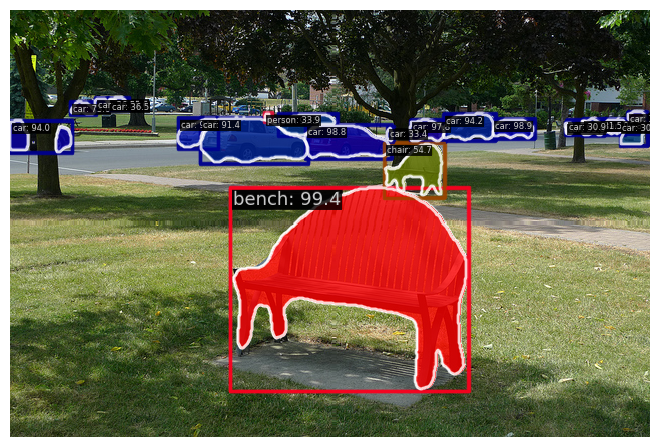

In [9]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

## Train a Detector on A Customized Dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



# Prepare a demo dataset
We use balloon dataset for demo <br>
This tutorial we aim at demonstrating how to start with a dataset with labeled with Labelme, so we have converted the dataset to the annotation format when installing <br>
If you have not label a dataset yet, you can use Labelme to label. Unclick Save with Image Data<br>
The dataset should be in below format

You can run the below script to convert Labelme format to the package required format, which would generate a unified json for train set and val set respecitively. <br>

In [10]:
import os
import json
import glob
import numpy as np
from PIL import Image

def convert_labelmedataset_to_coco(input_folder, output_json, categories):
    """
    Convert a folder of LabelMe JSON instance segmentation annotations to a single COCO format JSON.

    Args:
        input_folder (str): Path to folder containing LabelMe .json files.
        output_json (str): Output file path for COCO-format JSON.
        categories (list of str): List of category names (e.g. ['A', 'B']).
    """
    category_mapping = {name: i for i, name in enumerate(categories)}  # COCO category IDs start at 1

    # Initialize COCO structure
    coco_output = {
        "images": [],
        "annotations": [],
        "categories": [{"id": cid, "name": name} for name, cid in category_mapping.items()]
    }

    annotation_id = 0
    image_id = 0

    def polygon_area(xy):
        """Compute area of polygon from [x1, y1, x2, y2, ...]"""
        x = np.array(xy[0::2])
        y = np.array(xy[1::2])
        return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

    for json_path in glob.glob(os.path.join(input_folder, '*.json')):
        with open(json_path, 'r') as f:
            data = json.load(f)

        image_filename = data['imagePath']
        height = data.get('imageHeight')
        width = data.get('imageWidth')

        # Try loading image to get size if missing
        if not height or not width:
            image_full_path = os.path.join(input_folder, image_filename)
            if os.path.exists(image_full_path):
                with Image.open(image_full_path) as img:
                    width, height = img.size
            else:
                continue  # skip if dimensions can't be determined

        # Add image entry
        coco_output['images'].append({
            "id": image_id,
            "file_name": image_filename,
            "height": height,
            "width": width
        })

        # Process shapes
        for shape in data['shapes']:
            label = shape['label']
            if label not in category_mapping:
                continue
            if shape['shape_type'] != 'polygon':
                continue

            polygon = shape['points']
            flattened = np.array(polygon).flatten().tolist()
            segmentation = [flattened]

            x_coords = [p[0] for p in polygon]
            y_coords = [p[1] for p in polygon]
            x_min, y_min = min(x_coords), min(y_coords)
            x_max, y_max = max(x_coords), max(y_coords)
            width_box = x_max - x_min
            height_box = y_max - y_min
            area = polygon_area(flattened)

            coco_output['annotations'].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": category_mapping[label],
                "segmentation": segmentation,
                "bbox": [x_min, y_min, width_box, height_box],
                "area": area,
                "iscrowd": 0
            })
            annotation_id += 1

        image_id += 1

    # Write output
    with open(output_json, 'w') as f:
        json.dump(coco_output, f, indent=2)

    print(f"COCO annotations saved to {output_json}")

all_categories = ['Balloon'] # our class names

convert_labelmedataset_to_coco(
    input_folder='./data/balloon/train',
    output_json='./data/balloon/train.json',
    categories=all_categories
)
convert_labelmedataset_to_coco(
    input_folder='./data/balloon/val',
    output_json='./data/balloon/val.json',
    categories=all_categories
)

COCO annotations saved to ./data/balloon/train.json
COCO annotations saved to ./data/balloon/val.json


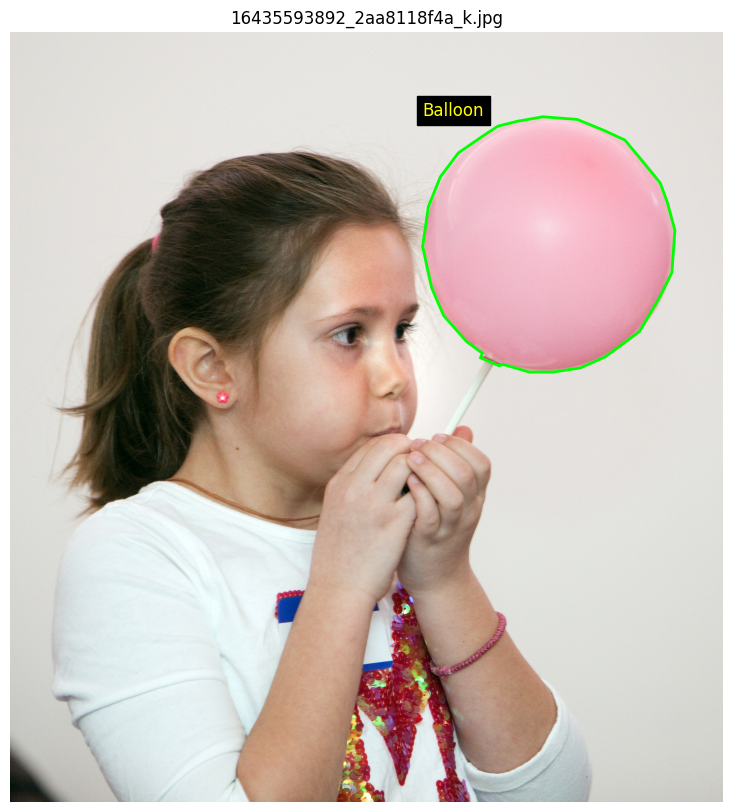

In [11]:
# plot a sample
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os
import json

coco_json_path='./data/balloon/train.json'
image_folder='./data/balloon/train/' # or your image folder

with open(coco_json_path, 'r') as f:
    coco = json.load(f)

image = random.choice(coco['images'])
image_id = image['id']
image_path = os.path.join(image_folder, image['file_name'])

img = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
ax = plt.gca()

# Get annotations for this image
annotations = [ann for ann in coco['annotations'] if ann['image_id'] == image_id]
categories = {cat['id']: cat['name'] for cat in coco['categories']}

for ann in annotations:
    for seg in ann['segmentation']:
        poly = np.array(seg).reshape(-1, 2)
        patch = patches.Polygon(poly, closed=True, edgecolor='lime', fill=False, linewidth=2)
        ax.add_patch(patch)

    # Label at top-left corner of bounding box
    x, y, w, h = ann['bbox']
    label = categories[ann['category_id']]
    ax.text(x, y - 3, label, color='yellow', fontsize=12, backgroundcolor='black')

plt.axis('off')
plt.title(image['file_name'])
plt.show()


# Train our model

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [12]:
from mmengine import Config
cfg = Config.fromfile('./configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
auto_scale_lr = dict(base_batch_size=16, enable=False)
backend_args = None
data_root = 'data/coco/'
dataset_type = 'CocoDataset'
default_hooks = dict(
    checkpoint=dict(interval=1, type='CheckpointHook'),
    logger=dict(interval=50, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='DetVisualizationHook'))
default_scope = 'mmdet'
env_cfg = dict(
    cudnn_benchmark=False,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
load_from = None
log_level = 'INFO'
log_processor = dict(by_epoch=True, type='LogProcessor', window_size=50)
model = dict(
    backbone=dict(
        depth=50,
        frozen_stages=1,
        init_cfg=dict(checkpoint='torchvision://resnet50', type='Pretrained'),
        norm_cfg=dict(requires_grad=True, type='BN'),
        norm_eval=True,
        num_stages=4,
        out_

Looks carefully in the configs, identify what need to be revised to fit our model <br>
the layer of 'dict' is chained by a '.' <br>
Here are the list that need to be revised: <br>
 <br>
load_from&nbsp;&nbsp;&nbsp;&nbsp;#set pretrained model, usually preferred to start with pretrained model <br>
optim_wrapper.optimizer.lr&nbsp;&nbsp;&nbsp;&nbsp;#learning rate, the default is for 8gpu, which maybe to large <br>
 <br>
train_cfg.max_epochs&nbsp;&nbsp;&nbsp;&nbsp;#number of epoch, we needs less epoch for transfer learning <br>
train_cfg.val_interval&nbsp;&nbsp;&nbsp;&nbsp;#Runs validation every N epochs <br>
default_hooks.checkpoint.interval&nbsp;&nbsp;&nbsp;&nbsp;#Saves a checkpoint every N epochs <br>
default_hooks.logger.interval&nbsp;&nbsp;&nbsp;&nbsp;#Logs training info every N iterations <br>
 <br>
param_scheduler[0].end&nbsp;&nbsp;&nbsp;&nbsp;#number of epoch or iteration of warmup <br>
param_scheduler[0].by_epoch&nbsp;&nbsp;&nbsp;&nbsp;#the above defined by epoch or iteration <br>
param_scheduler[1].begin&nbsp;&nbsp;&nbsp;&nbsp;#the epoch or iteration of when annealing begin <br>
param_scheduler[1].end&nbsp;&nbsp;&nbsp;&nbsp;#the epoch or iteration of when annealing end <br>
 <br>
data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
train_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of training set annotation json <br
train_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing training set images <br>
train_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
train_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
val_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of validation set annotation json <br>
val_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing validation set images <br>
val_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
val_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
test_dataloader.dataset.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#name of testing set annotation json <br>
test_dataloader.dataset.data_prefix&nbsp;&nbsp;&nbsp;&nbsp;#folder of storing testing set images <br>
test_dataloader.dataset.data_root&nbsp;&nbsp;&nbsp;&nbsp;#the dataset location <br>
test_dataloader.dataset.metainfo&nbsp;&nbsp;&nbsp;&nbsp;#metainfo of our dataset <br>
val_evaluator.ann_file&nbsp;&nbsp;&nbsp;&nbsp;#locatio and name of validation set annotation json <br>
test_evaluator.ann_file&nbsp;&nbsp;&nbsp;&nbsp;##locatio and name of testing set annotation json <br>
 <br>
train_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
val_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
test_dataloader.batch_size&nbsp;&nbsp;&nbsp;&nbsp;#set a batch size that fits your gpu <br>
 <br>
model.roi_head.bbox_head.num_classes&nbsp;&nbsp;&nbsp;&nbsp;#number of class, we have 1, it appears 3 times in the config that all need to be revised <br>
model.roi_head.mask_head.num_classes&nbsp;&nbsp;&nbsp;&nbsp;#number of class, we have 1 <br>
 <br>
for configs explanation, you can refer to <br>
https://mmdetection.readthedocs.io/en/stable/user_guides/config.html <br>
for more augmentation, you can refer to <br>
https://mmdetection.readthedocs.io/en/v2.19.1/tutorials/data_pipeline.html <br>
https://mmdetection.readthedocs.io/en/v2.16.0/_modules/mmdet/datasets/pipelines/transforms.html <br>
for mixup and mosaic <br>
https://mmdetection.readthedocs.io/en/latest/advanced_guides/how_to.html#use-mosaic-augmentation <br>

In [13]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
    'classes': ('Balloon', ), # names of classes
    'palette': [
        (220, 20, 60),
    ]
}

cfg.load_from = './checkpoint/cascade_mask_rcnn_r50_fpn_1x_coco_20200203-9d4dcb24.pth' # use the pre-trained Mask RCNN model to obtain a higher performance
cfg.optim_wrapper.optimizer.lr = cfg.optim_wrapper.optimizer.lr/8 #set it to default/8 maybe enough, you can increase if find it too small

#cfg.train_cfg.max_epochs = number of epochs
#cfg.train_cfg.val_interval = evaluation interval
#cfg.default_hooks.checkpoint.interval = checkpoint saving interval
#cfg.default_hooks.logger.interval = log recording interval
cfg.default_hooks.checkpoint.save_best = 'auto' #save best checkpoint
cfg.param_scheduler[0].end = 2 #number of epoch or iteration of warmup
cfg.param_scheduler[0].by_epoch = True #the above defined by epoch or iteration
cfg.param_scheduler[1].begin = 2 #the epoch or iteration of when MultiStepLR begin
cfg.param_scheduler[1].milestones = [6,8] #decay at the Nth epoch since begin
#cfg.param_scheduler[1].end#the epoch or iteration of when MultiStepLR end

cfg.data_root = 'data/balloon/'
cfg.train_dataloader.dataset.ann_file = 'train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

cfg.val_dataloader.dataset.ann_file = 'val.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'val/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

cfg.test_dataloader = cfg.val_dataloader

cfg.val_evaluator.ann_file = cfg.data_root+'val.json'
cfg.test_evaluator = cfg.val_evaluator

# Modify num classes of the model in box head and mask head
for head in cfg.model.roi_head.bbox_head:
    head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

cfg.train_dataloader.batch_size =4
cfg.val_dataloader.batch_size =4
cfg.test_dataloader.batch_size  =4

# We can also use tensorboard to log the training process
#cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

#------------------------------------------------------
config=f'./configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

### Start training, Before that please restart the kernal

In [1]:
cd mmdetection

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection


/home/z890/.conda/envs/mm_dete_cascad/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%run tools/train.py configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py

06/30 14:17:11 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1210739779
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,co

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:17:24 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.151
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.298
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.690
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:17:33 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.730
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.857
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.602
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.830
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.802
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.802
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.802
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:17:42 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.785
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.874
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.860
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.101
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.719
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.865
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.856
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.856
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.856
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:17:50 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.798
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.883
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.872
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.734
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.856
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.856
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.856
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:17:58 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.796
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.876
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.729
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.877
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.850
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.850
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.850
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:04 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.802
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.885
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.872
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.711
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.896
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.854
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.854
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.854
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:12 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.877
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.859
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.671
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.888
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.830
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.830
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.830
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:18 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.775
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.863
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.887
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.818
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.818
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.818
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:25 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.778
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.863
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.845
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.892
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.820
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.820
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:31 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.896
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.822
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:37 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.897
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.822
 Average

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:18:43 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.846
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.897
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.822
 Average

In [3]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

# plot learning curve

In [4]:
base_dir = "work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/"
top_subdirs = [
        os.path.join(base_dir, d)
        for d in os.listdir(base_dir)
        if os.path.isdir(os.path.join(base_dir, d))
    ]
print(top_subdirs)

['work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/20250630_141710', 'work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/20250630_141005']


In [5]:
#Suppose we use the latest run for example
import os
def get_latest_config(base_dir):
    # Get top-level subdirectories in the base directory
    top_subdirs = [
        os.path.join(base_dir, d)
        for d in os.listdir(base_dir)
        if os.path.isdir(os.path.join(base_dir, d))
    ]
    # Sort subdirectories by create time (most recent first)
    top_subdirs.sort(key=os.path.getctime, reverse=True)
    #print(top_subdirs)
    for top_dir in top_subdirs:
        # Walk through the subdirectory tree
        for root, dirs, files in os.walk(top_dir):
            # Look for the specific path vis_data/scalars.json
            if "vis_data" in dirs:
                target = os.path.join(root, "vis_data", "scalars.json")
                if os.path.exists(target):
                    return target
    return None

latest_config = get_latest_config("work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/")
print(latest_config)

work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/20250630_141710/vis_data/scalars.json


plot curve of work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/20250630_141710/vis_data/scalars.json, metric is loss


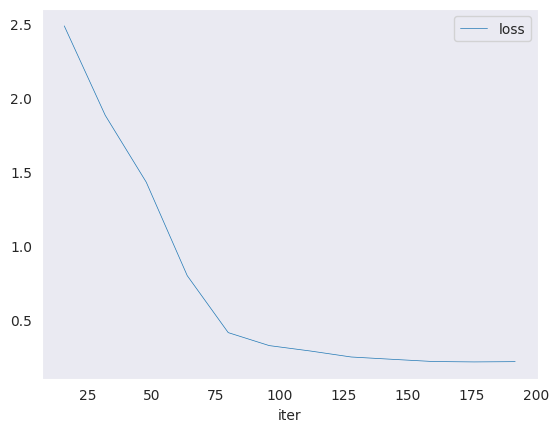

In [6]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys loss --legend loss

plot curve of work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/20250630_141710/vis_data/scalars.json, metric is segm_mAP


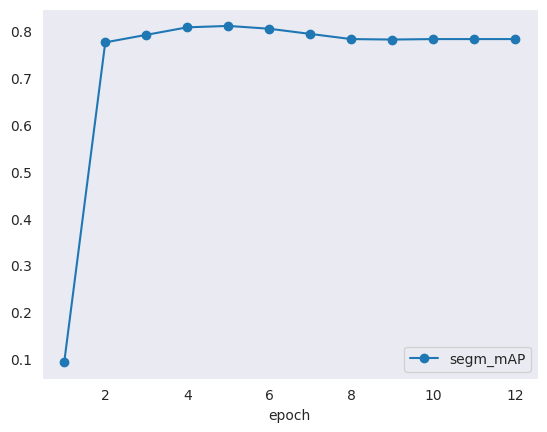

In [7]:
%run tools/analysis_tools/analyze_logs.py plot_curve {latest_config} --keys segm_mAP --legend segm_mAP

# Read the training log
Every epoch, the log prints current training status incluing Loss and learning rate(LR). <br>
and then current accuracy in segm_mAP. <br>

In ideal scenario, training loss decreases and accuracy increases gradually throughout the training. <br> 
When it comes to the end of training, training loss would still decreases slightly, while accuracy stops improving, and it should be already satisfactory. <br>
 <br>
If training loss decreases and accuracy increases slowly, you may increase learning rate (eg double it) <br>
If both training loss and accuracy flutuate violently, you may decrease learning rate (eg half it) <br>
If accuracy is still improving at the end of training, you may increase number of epoch <br>
If training loss decreases while accuracy stagnates or worsens before getting satisfactory accuracy, you should add more samples or implement stronger augmentation, and ensure the two datasets are alike <br>
If both training loss and accuracy stagnates, and the accuracy is not satisfactory, you should consider choosing a more advanced or larger model <br>

# Augmentations

In our cascade mask rcnn sample, there is a simple augmentation strategy applied. As stated in <br>
train_pipeline:<br>
&nbsp;&nbsp;&nbsp;&nbsp;dict(prob=0.5, type='RandomFlip'),<br>

To create more augmentation, we can add it into train_pipeline <br>
for example, copy the below code and paste to the above script of training cfg, right above <br>
#------------------------------------------------------ <br>
config=f'./configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py' <br>

In [8]:
%run tools/analysis_tools/browse_dataset.py configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py --output-dir ./visualization --not-show

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[                                 ] 1/61, 13.4 task/s, elapsed: 0s, ETA:     4s

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmengine/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


[>>>>>>>>>>>                     ] 22/61, 10.0 task/s, elapsed: 2s, ETA:     4s

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:760: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 9.3 task/s, elapsed: 7s, ETA:     0s

# Inference
Here we inference on a single image <br>

In [9]:
import os
import glob

def get_best_checkpoint(base_dir):
    best_ckpt = None
    latest_time = 0

    pattern = os.path.join(base_dir, "best_coco_bbox_mAP_*.pth")
    candidates = glob.glob(pattern)

    for ckpt_path in candidates:
        mtime = os.path.getmtime(ckpt_path)
        if mtime > latest_time:
            latest_time = mtime
            best_ckpt = ckpt_path

    return best_ckpt

best_ckpt = get_best_checkpoint("work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/")
print(f"Using best checkpoint: {best_ckpt}")

Using best checkpoint: work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/best_coco_bbox_mAP_epoch_6.pth


In [10]:
# here we demo how to use another approach to test
from mmdet.apis import DetInferencer

# Choose a config that we used for training
config = './configs/cascade_rcnn/cascade-mask-rcnn_r50_fpn_1x_balloon.py'
# Setup a checkpoint file to load, input the location of best pth we trained
checkpoint = best_ckpt
# Set the device to be used for evaluation
device = 'cuda'

# Initialize the DetInferencer
inferencer = DetInferencer(config, checkpoint, device)

# Use the detector to do inference, 
img = './data/balloon/val/3825919971_93fb1ec581_b.jpg'
result = inferencer(img, out_dir='./output', pred_score_thr=0.5)

Loads checkpoint by local backend from path: work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/best_coco_bbox_mAP_epoch_6.pth
06/30 14:19:53 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmengine/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


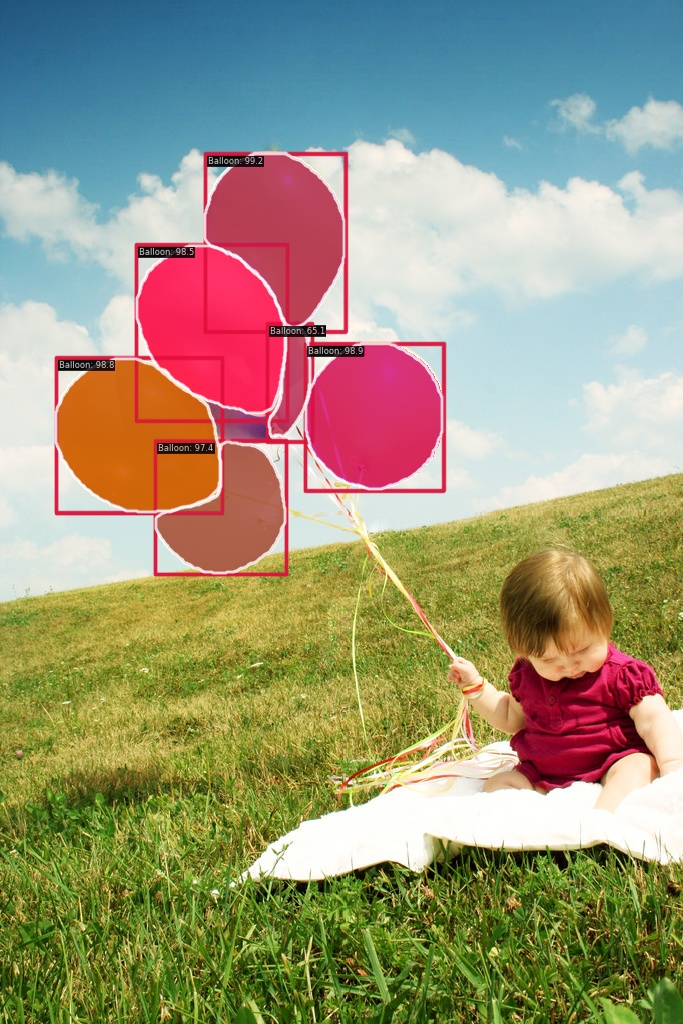

In [11]:
# Show the output image
from PIL import Image
Image.open('./output/vis/3825919971_93fb1ec581_b.jpg')

# Validation
revise the name of .py and .pkl for your own project <br>
it will save the prediction of all samples in validation set in a pkl

In [12]:
%run tools/test.py work_dirs/cascade-mask-rcnn_r50_fpn_1x_balloon/cascade-mask-rcnn_r50_fpn_1x_balloon.py {best_ckpt} --out output/cascade-mask-rcnn_r50_fpn_1x_balloon.pkl

06/30 14:19:54 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 761568761
    GPU 0: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda-12.8
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.7.0+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compute_75,cod

/home/z890/Downloads/ml_sample_develop/carasml/detection/mm_CascadeMaskRCNN/mmdetection/mmdet/models/roi_heads/mask_heads/fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


06/30 14:19:56 - mmengine - INFO - Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.802
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.885
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.872
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.269
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.711
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.896
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.854
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.854
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.854
 Average

In [15]:
import torch
#after training/testing, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


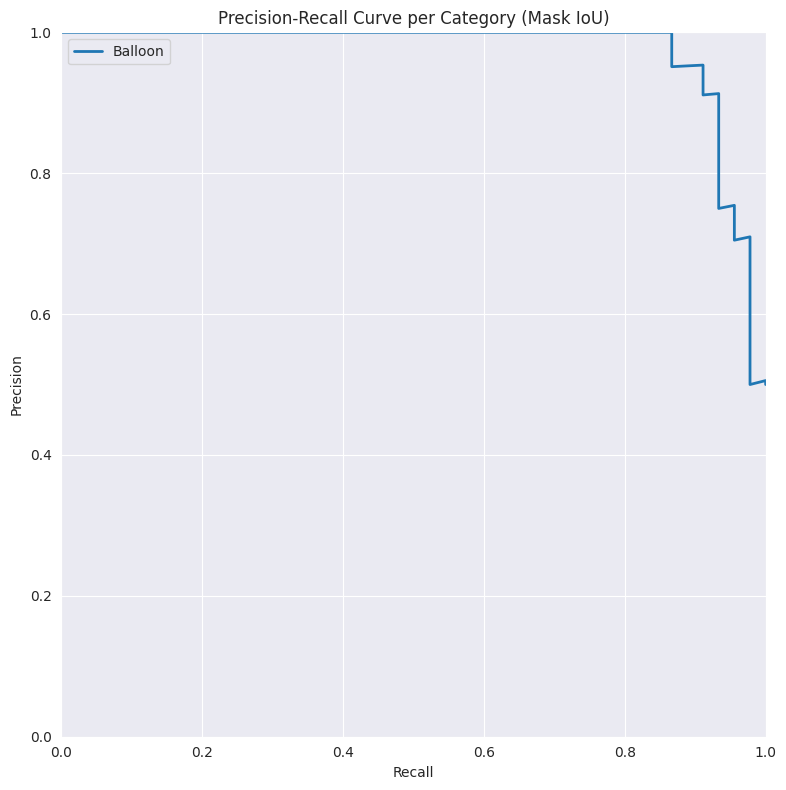

In [16]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
from collections import defaultdict
from sklearn.metrics import precision_recall_curve

# Configuration
truth_json = 'data/balloon/val.json'  # COCO format ground truth
pred_pkl = 'output/cascade-mask-rcnn_r50_fpn_1x_balloon.pkl'  # Prediction pickle with RLE masks

# Load ground truth
coco_gt = COCO(truth_json)

# Load predictions
with open(pred_pkl, 'rb') as f:
    pred_data = pickle.load(f)

# Get category information
categories = coco_gt.loadCats(coco_gt.getCatIds())
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
cat_name_to_id = {cat['name']: cat['id'] for cat in categories}
cat_ids = list(cat_id_to_name.keys())

# Process predictions into standardized format
predictions = []
for pred in pred_data:
    ins = pred['pred_instances']
    for i in range(len(ins['labels'])):
        predictions.append({
            'image_id': pred['img_id'],
            'category_id': ins['labels'][i].item(),
            'bbox': ins['bboxes'][i].numpy().tolist(),
            'segmentation': ins['masks'][i],
            'score': ins['scores'][i].item(),
        })

# Group predictions by category
preds_by_cat = defaultdict(list)
for pred in predictions:
    preds_by_cat[pred['category_id']].append(pred)

# Group GT annotations by category
gt_by_cat = defaultdict(list)
for ann in coco_gt.dataset['annotations']:
    gt_by_cat[ann['category_id']].append(ann)

def compute_mask_iou(rle1, rle2):
    """
    Compute IoU between two RLE masks using pycocotools.
    Args:
        rle1: RLE mask (dict with 'counts' and 'size')
        rle2: RLE mask (dict with 'counts' and 'size')
    Returns:
        iou (float): Intersection over Union
    """
    # Decode RLEs to binary masks
    mask1 = maskUtils.decode(rle1)
    mask2 = maskUtils.decode(rle2)
    
    # Intersection and Union
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    
    iou = np.sum(intersection) / (np.sum(union) + 1e-6)  # Avoid division by zero
    return iou

class_curves = {}
iou_threshold = 0.8 

for cat_id in cat_ids:
    y_true = []
    y_scores = []
    preds = sorted(preds_by_cat[cat_id], key=lambda x: -x['score'])
    gt_annots = gt_by_cat[cat_id]
    used = set()
    
    for pred in preds:
        pred_rle = {
            'size': pred['segmentation']['size'],
            'counts': pred['segmentation']['counts']
        }
        image_id = pred['image_id']
        best_iou = iou_threshold
        best_gt_id = None

        for gt in gt_annots:
            if gt['image_id'] != image_id or gt['id'] in used:
                continue
            
            # Polygon format (convert to RLE)
            polygon = gt['segmentation']
            
            # Get image dimensions from COCO
            img_info = coco_gt.loadImgs(gt['image_id'])[0]
            height, width = img_info['height'], img_info['width']
            
            # Convert polygon to RLE
            gt_rle = maskUtils.frPyObjects(polygon, height, width)
            gt_rle = maskUtils.merge(gt_rle) #gt_rle[0]  # frPyObjects returns a list; take the first element
            
            iou = compute_mask_iou(pred_rle, gt_rle)
            if iou > best_iou:
                best_iou = iou
                best_gt_id = gt['id']
                
        used.add(best_gt_id)
        y_true.append(1 if best_gt_id is not None else 0)
        y_scores.append(pred['score'])

    if len(set(y_true)) < 2:
        if sum(y_true) == 0:
            print(f"Class {cat_id_to_name[cat_id]} has ALL FALSE POSITIVES (no TP).")
        else:
            print(f"Class {cat_id_to_name[cat_id]} has ALL TRUE POSITIVES (no FP).")
        continue

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    class_curves[cat_id] = {
        'precision': precision,
        'recall': recall
    }

# Plotting Precision-Recall curves (same as before)
plt.figure(figsize=(10, 8))
for cat_id, data in class_curves.items():
    plt.plot(data['recall'], data['precision'], label=cat_id_to_name[cat_id], linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Category (Mask IoU)')
plt.grid(True)
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


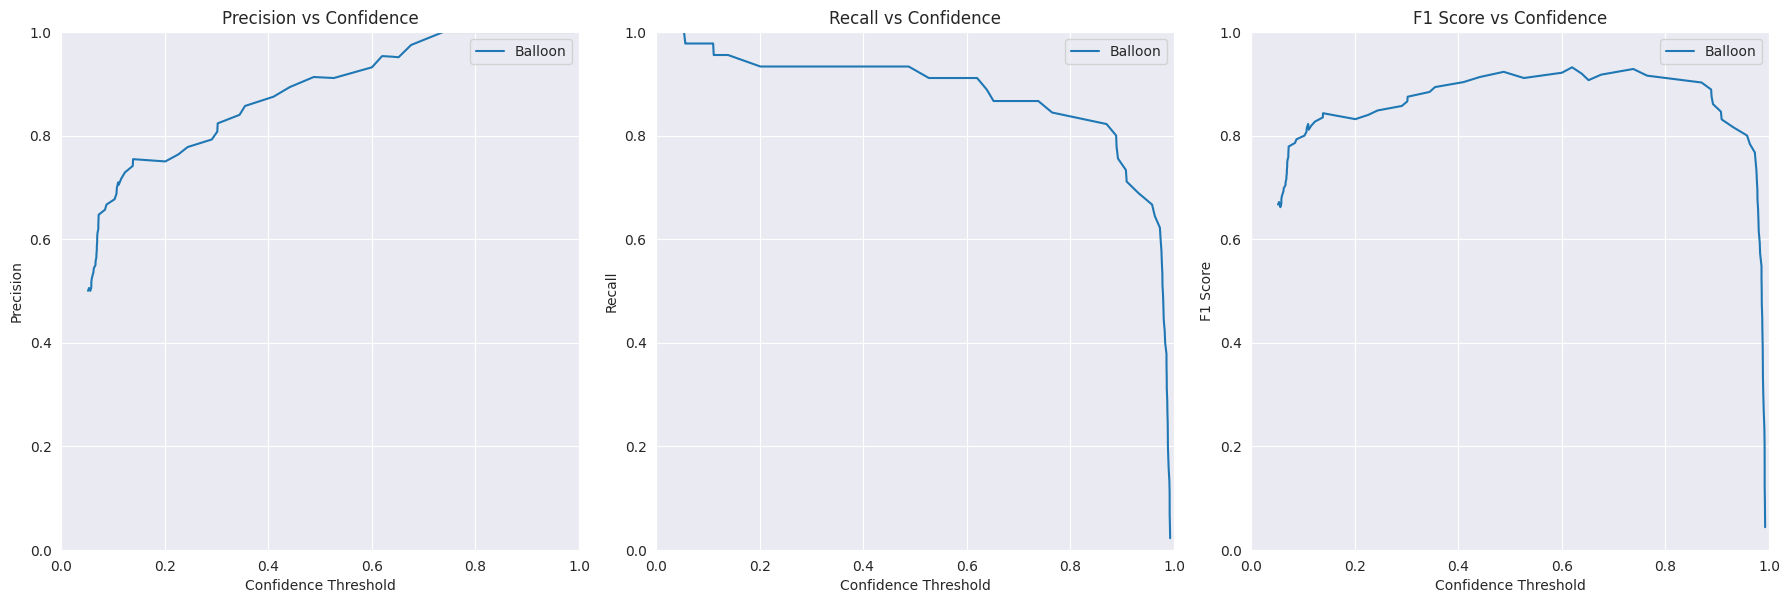

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from collections import defaultdict
from sklearn.metrics import precision_recall_curve

# Configuration
truth_json = 'data/balloon/val.json'  # COCO format ground truth
pred_pkl = 'output/cascade-mask-rcnn_r50_fpn_1x_balloon.pkl'  # Prediction pickle with RLE masks

# Load ground truth
coco_gt = COCO(truth_json)

# Load predictions
with open(pred_pkl, 'rb') as f:
    pred_data = pickle.load(f)

# Get category information
categories = coco_gt.loadCats(coco_gt.getCatIds())
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
cat_name_to_id = {cat['name']: cat['id'] for cat in categories}
cat_ids = list(cat_id_to_name.keys())

# Process predictions into standardized format
predictions = []
for pred in pred_data:
    ins = pred['pred_instances']
    for i in range(len(ins['labels'])):
        predictions.append({
            'image_id': pred['img_id'],
            'category_id': ins['labels'][i].item(),
            'bbox': ins['bboxes'][i].numpy().tolist(),
            'segmentation': ins['masks'][i],
            'score': ins['scores'][i].item(),
        })

# Group predictions by category
preds_by_cat = defaultdict(list)
for pred in predictions:
    preds_by_cat[pred['category_id']].append(pred)

# Group GT annotations by category
gt_by_cat = defaultdict(list)
for ann in coco_gt.dataset['annotations']:
    gt_by_cat[ann['category_id']].append(ann)

def compute_mask_iou(rle1, rle2):
    """
    Compute IoU between two RLE masks using pycocotools.
    Args:
        rle1: RLE mask (dict with 'counts' and 'size')
        rle2: RLE mask (dict with 'counts' and 'size')
    Returns:
        iou (float): Intersection over Union
    """
    # Decode RLEs to binary masks
    mask1 = maskUtils.decode(rle1)
    mask2 = maskUtils.decode(rle2)
    
    # Intersection and Union
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    
    iou = np.sum(intersection) / (np.sum(union) + 1e-6)  # Avoid division by zero
    return iou

class_curves = {}
iou_threshold = 0.8 

for cat_id in cat_ids:
    y_true = []
    y_scores = []
    preds = sorted(preds_by_cat[cat_id], key=lambda x: -x['score'])
    gt_annots = gt_by_cat[cat_id]
    used = set()
    
    for pred in preds:
        pred_rle = {
            'size': pred['segmentation']['size'],
            'counts': pred['segmentation']['counts']
        }
        image_id = pred['image_id']
        best_iou = iou_threshold
        best_gt_id = None

        for gt in gt_annots:
            if gt['image_id'] != image_id or gt['id'] in used:
                continue
            
            # Polygon format (convert to RLE)
            polygon = gt['segmentation']
            
            # Get image dimensions from COCO
            img_info = coco_gt.loadImgs(gt['image_id'])[0]
            height, width = img_info['height'], img_info['width']
            
            # Convert polygon to RLE
            gt_rle = maskUtils.frPyObjects(polygon, height, width)
            gt_rle = maskUtils.merge(gt_rle) #gt_rle[0]  # frPyObjects returns a list; take the first element
            
            iou = compute_mask_iou(pred_rle, gt_rle)
            if iou > best_iou:
                best_iou = iou
                best_gt_id = gt['id']
                
        used.add(best_gt_id)
        y_true.append(1 if best_gt_id is not None else 0)
        y_scores.append(pred['score'])

    if len(set(y_true)) < 2:
        if sum(y_true) == 0:
            print(f"Class {cat_id_to_name[cat_id]} has ALL FALSE POSITIVES (no TP).")
        else:
            print(f"Class {cat_id_to_name[cat_id]} has ALL TRUE POSITIVES (no FP).")
        continue

    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    class_curves[cat_id] = {
        'precision': precision,
        'recall': recall,
        'thresholds': thresholds
    }

# Plotting
plt.figure(figsize=(18, 6))

# 1. Precision-Confidence
plt.subplot(1, 3, 1)
for cat_id, data in class_curves.items():
    plt.plot(data['thresholds'], data['precision'][:-1], 
             label=cat_id_to_name[cat_id])
plt.xlabel('Confidence Threshold')
plt.ylabel('Precision')
plt.title('Precision vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# 2. Recall-Confidence
plt.subplot(1, 3, 2)
for cat_id, data in class_curves.items():
    plt.plot(data['thresholds'], data['recall'][:-1], 
             label=cat_id_to_name[cat_id])
plt.xlabel('Confidence Threshold')
plt.ylabel('Recall')
plt.title('Recall vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

# 3. NEW: F1-Confidence
plt.subplot(1, 3, 3)
for cat_id, data in class_curves.items():
    # Calculate F1 scores
    precision = data['precision'][:-1]
    recall = data['recall'][:-1]
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    
    plt.plot(data['thresholds'], f1_scores, 
             label=cat_id_to_name[cat_id])

plt.xlabel('Confidence Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Confidence')
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.tight_layout()
#plt.savefig('precision_recall_f1_confidence.png', bbox_inches='tight', dpi=300)
plt.show()

# you can choose a confidence threshold that has highest F1 Score when inference.

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


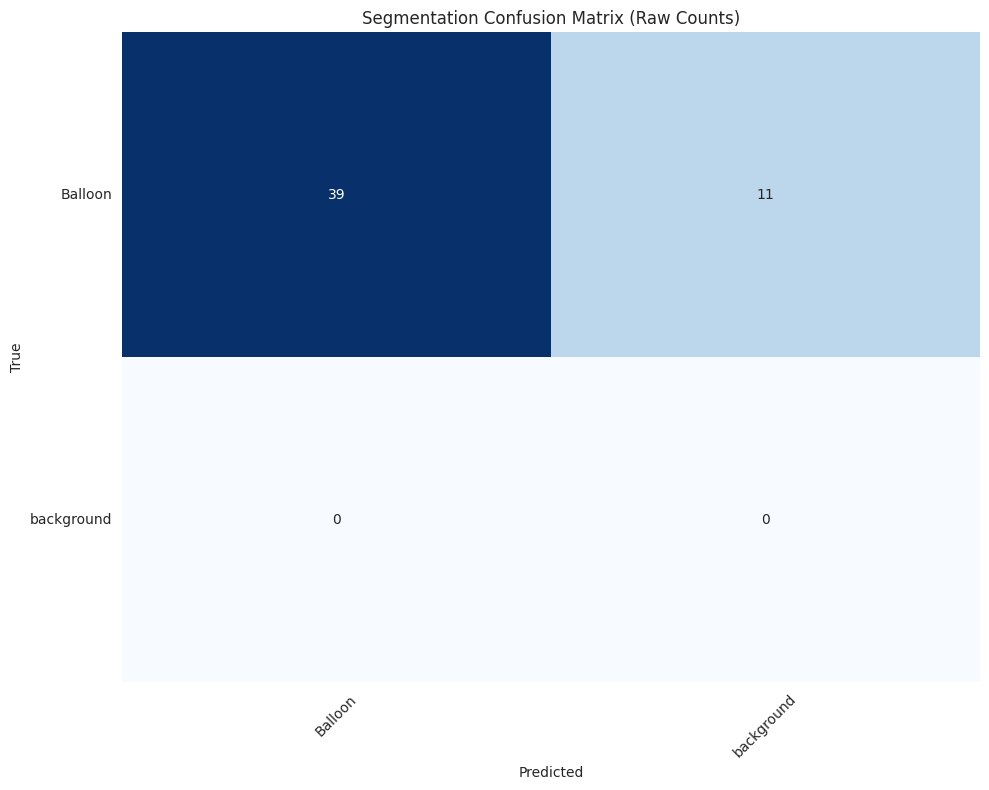

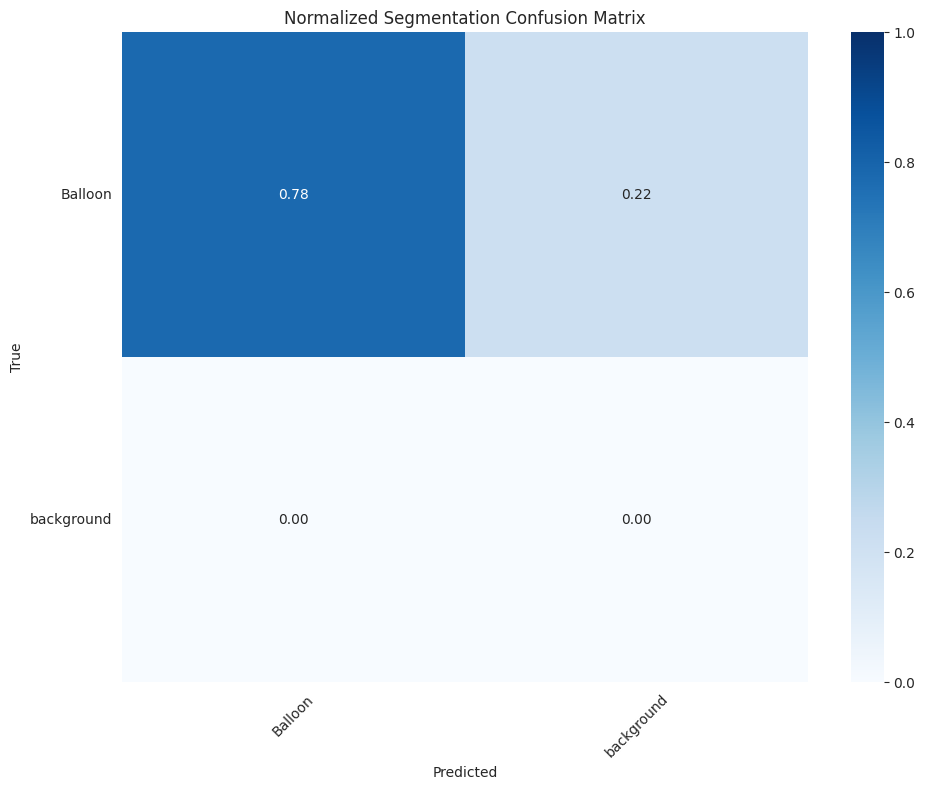

In [18]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
from collections import defaultdict
import seaborn as sns

# Configuration
truth_json = 'data/balloon/val.json'  # COCO format ground truth
pred_pkl = 'output/cascade-mask-rcnn_r50_fpn_1x_balloon.pkl'  # Prediction pickle with RLE masks

# Load ground truth
coco_gt = COCO(truth_json)

# Load predictions
with open(pred_pkl, 'rb') as f:
    pred_data = pickle.load(f)

# Get category information
categories = coco_gt.loadCats(coco_gt.getCatIds())
cat_id_to_name = {cat['id']: cat['name'] for cat in categories}
cat_name_to_id = {cat['name']: cat['id'] for cat in categories}
cat_ids = list(cat_id_to_name.keys())
class_names = [cat['name'] for cat in categories]

conf_threshold = 0.7
# Process predictions into standardized format
predictions = []
for pred in pred_data:
    ins = pred['pred_instances']
    for i in range(len(ins['labels'])):
        if ins['scores'][i].item()>conf_threshold:
            predictions.append({
                'image_id': pred['img_id'],
                'category_id': ins['labels'][i].item(),
                'bbox': ins['bboxes'][i].numpy().tolist(),
                'segmentation': ins['masks'][i],
                'score': ins['scores'][i].item(),
            })

# Group predictions by category
preds_by_cat = defaultdict(list)
for pred in predictions:
    preds_by_cat[pred['category_id']].append(pred)

# Group GT annotations by category
gt_by_cat = defaultdict(list)
for ann in coco_gt.dataset['annotations']:
    gt_by_cat[ann['category_id']].append(ann)

def compute_mask_iou(rle1, rle2):
    """
    Compute IoU between two RLE masks using pycocotools.
    Args:
        rle1: RLE mask (dict with 'counts' and 'size')
        rle2: RLE mask (dict with 'counts' and 'size')
    Returns:
        iou (float): Intersection over Union
    """
    # Decode RLEs to binary masks
    mask1 = maskUtils.decode(rle1)
    mask2 = maskUtils.decode(rle2)
    
    # Intersection and Union
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    
    iou = np.sum(intersection) / (np.sum(union) + 1e-6)  # Avoid division by zero
    return iou

def compute_segm_confusion_matrix(coco_gt, predictions, iou_thresh=0.65):
    """
    Compute confusion matrix with segmentation mask IoU matching
    Returns: (raw_confusion_matrix, normalized_confusion_matrix)
    """
    num_classes = len(coco_gt.getCatIds())
    cm = np.zeros((num_classes+1, num_classes+1), dtype=int)  # +1 for background/FP
    
    # Group GT and predictions by image
    gt_by_image = defaultdict(list)
    for ann in coco_gt.dataset['annotations']:
        gt_by_image[ann['image_id']].append(ann)
    
    pred_by_image = defaultdict(list)
    for pred in predictions:
        pred_by_image[pred['image_id']].append(pred)
    
    # Process each image
    for img_id in gt_by_image.keys():
        gt_anns = gt_by_image[img_id]
        dt_anns = pred_by_image.get(img_id, [])
        
        # Sort predictions by confidence (highest first)
        dt_anns = sorted(dt_anns, key=lambda x: -x['score'])
        
        # Track which GT have been matched
        matched_gt = [False] * len(gt_anns)
        
        for dt in dt_anns:
            best_iou = iou_thresh
            best_idx = -1
            
            # Convert prediction to RLE
            pred_rle = {
                'size': dt['segmentation']['size'],
                'counts': dt['segmentation']['counts']
            }
            
            # Find best matching GT
            for i, gt in enumerate(gt_anns):
                if not matched_gt[i]:
                    # Convert GT polygon to RLE
                    img_info = coco_gt.loadImgs(gt['image_id'])[0]
                    height, width = img_info['height'], img_info['width']
                    gt_rle = maskUtils.frPyObjects(gt['segmentation'], height, width)
                    if isinstance(gt_rle, list):
                        gt_rle = maskUtils.merge(gt_rle) #gt_rle[0]  # Take first element if it's a list
                    
                    iou = compute_mask_iou(pred_rle, gt_rle)
                    if iou > best_iou:
                        best_iou = iou
                        best_idx = i
            
            if best_idx >= 0:  # True positive
                matched_gt[best_idx] = True
                gt_class = gt_anns[best_idx]['category_id']
                dt_class = dt['category_id']
                cm[gt_class, dt_class] += 1
            else:  # False positive
                dt_class = dt['category_id']
                cm[-1, dt_class] += 1  # Last row is for FP
        
        # Any unmatched GT are false negatives
        for i, matched in enumerate(matched_gt):
            if not matched:
                gt_class = gt_anns[i]['category_id']
                cm[gt_class, -1] += 1  # Last column is for FN
    
    # Normalized version (row-wise)
    cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-6)
    
    return cm, cm_norm

# Compute confusion matrices
cm_raw, cm_norm = compute_segm_confusion_matrix(coco_gt, predictions)
class_names_with_bg = class_names + ['background']

# Plot raw confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', 
            xticklabels=class_names_with_bg, yticklabels=class_names_with_bg,
            cmap='Blues', cbar=False)
plt.title('Segmentation Confusion Matrix (Raw Counts)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2f', 
            xticklabels=class_names_with_bg, yticklabels=class_names_with_bg,
            cmap='Blues', vmin=0, vmax=1)
plt.title('Normalized Segmentation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()